# Assignment 03

## Mani Kanta Yaswanth Jalagadugu U48993625


## Step 1: Import the libraries we will use in this notebook

In [4]:
# import neccessary libraries
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

import matplotlib.pylab as plt
# set the random seed
np.random.seed(1) # set this to ensure the results are repeatable. 

In [5]:
%matplotlib inline 

## Step 2: Load the given data that we will model

In [6]:
df = pd.read_csv('C:/Users/Mani Kanta Yaswanth/Downloads/riding_mowers.csv')

df.head(20)

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,owners
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner
9,93.0,20.8,Owner


## Step 3: Prepare the Data


In [7]:
# determine the number of rows and columns

rows = df.shape[0]
cols = df.shape[1]
print(f"Rows={rows} and Cols={cols}")

Rows=24 and Cols=3


In [8]:
# check to see if there is any missing values, and if so, then fix this issue.

df.isna().sum()


Income       0
Lot_Size     0
Ownership    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     24 non-null     float64
 1   Lot_Size   24 non-null     float64
 2   Ownership  24 non-null     object 
dtypes: float64(2), object(1)
memory usage: 708.0+ bytes


In [10]:
# check to see if there are any topos, and if so, then fix this issue.

df['Ownership'].unique()

array(['Owner', 'owners', 'Nonowner', 'nonowner'], dtype=object)

In [11]:
#df.replace(['nonowner'], 'Nonowner' ) 
df['Ownership'] = df['Ownership'].replace({'owners': 'Owner', 'nonowner': 'Nonowner'})
print(df['Ownership'].unique())

['Owner' 'Nonowner']


In [12]:
df_dummy = pd.get_dummies(
    df, 
    prefix_sep='_', 
    dummy_na=False, 
    drop_first=True, 
    columns=['Ownership'], 
    dtype='int32'
)
df


,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner
9,93.0,20.8,Owner


Text(0, 0.5, 'Lot Size (000s sqft)')

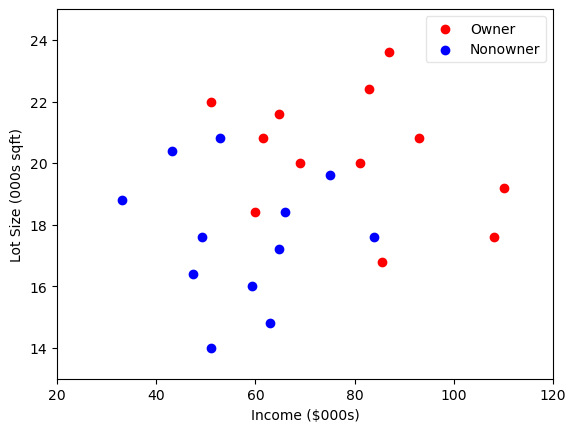

In [13]:
# visualize the data
 
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(df.loc[df.Ownership=='Owner']['Income'], 
           df.loc[df.Ownership=='Owner']['Lot_Size'], 
           marker='o', 
           color='red')
ax.scatter(df.loc[df.Ownership=='Nonowner']['Income'], 
           df.loc[df.Ownership=='Nonowner']['Lot_Size'], 
           marker='o', 
           color='blue')

ax.legend(["Owner", "Nonowner"], framealpha=0.5)
                                         
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot Size (000s sqft)')

## Step 4: Create a Classifier

Since the number of observations is low, you will alocate all of the data to training. Normally, you would split the data into training and testing sets.

In [14]:
# standardize the input data 

X = df[['Income', 'Lot_Size']]  # Features (all columns except the target)
y = df['Ownership']# Target variable

In [15]:
# Use LogisticRegression from sklearn.linear_model to create a predictive model. 
model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

model.fit(X, y)



LogisticRegression(max_iter=1000, n_jobs=-1)

In [16]:
results = pd.DataFrame()
results['actual'] = y
results['predicted'] = model.predict(X)
results

,actual,predicted
0,Owner,Nonowner
1,Owner,Nonowner
2,Owner,Owner
3,Owner,Owner
4,Owner,Owner
5,Owner,Owner
6,Owner,Owner
7,Owner,Owner
8,Owner,Owner
9,Owner,Owner


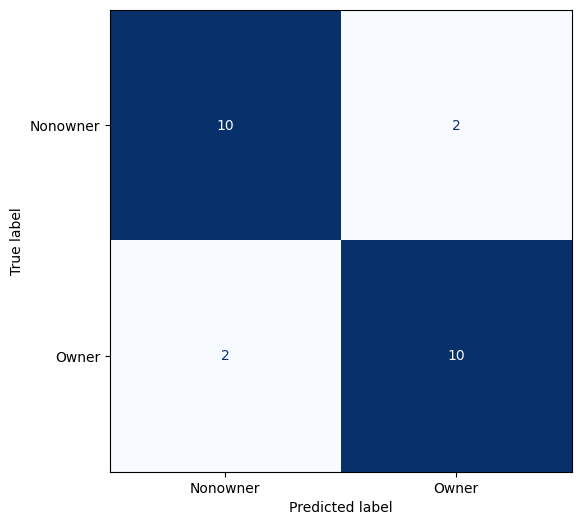

In [17]:
# display the confusion matrix
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

## Step 5: Analyze the linear regression model's performance

In [18]:
# Record the models performance using the following metrics:
# - Accuracy
print(accuracy_score(y, model.predict(X)))
# - Precision
print(precision_score(y, model.predict(X), pos_label='Owner'))
# - Recall
print(recall_score(y, model.predict(X), pos_label='Owner'))
# - F1 Score
f1_score(y, model.predict(X), pos_label='Owner')




0.8333333333333334
0.8333333333333334
0.8333333333333334


0.8333333333333334

## Step 6: Discuss the Results

After importing required libraries, we changed the required path and after preraing the data we can observe the dataframe is checked for missing values, and it is observed that there are none and a scatter plot is created to visualize the relationship between Income and Lot_Size based on the Ownership type. After that we created a classifier to display the confusion matrix. The performance of linear regression model's is calculated using the accuracy, precision, recall, F-1 Score and the model has the same score (approximately 0.8333) for all metrics, indicating consistent performance.